In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, WordNetLemmatizer
import nltk
import re 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Famin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
df=pd.read_csv('C:\\Users\\Famin\\Desktop\\Capstone\\stock_data.csv')
df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [6]:
df.shape

(5791, 2)

In [7]:
#5791 rows
#2 columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [9]:
df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [11]:
df['Sentiment'].value_counts()

 1    3685
-1    2106
Name: Sentiment, dtype: int64

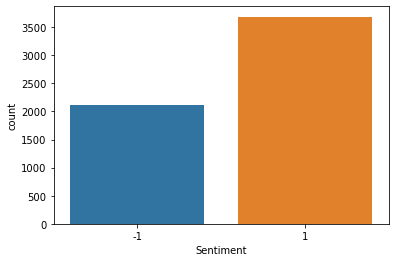

In [17]:
sns.countplot(df.Sentiment)

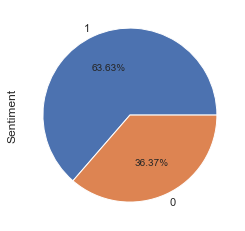

In [83]:
df['Sentiment'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

In [23]:
import re
import nltk
nltk.download("stopwords")
nltk.download('punkt')
from nltk import word_tokenize,sent_tokenize
nltk.download('wordnet')
import nltk as nlp

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Famin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Famin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Famin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [28]:
#Remove punctuation and Special characters
pure_list=[]
for pure in df.Text:
    pure=re.sub("[^a-zA-z]"," ",pure)
    pure=pure.lower()
    pure=nltk.word_tokenize(pure)
    lemma=nlp.WordNetLemmatizer()
    pure=[lemma.lemmatize(word) for word in pure]
    pure=" ".join(pure)
    pure_list.append(pure)


In [66]:
from sklearn.feature_extraction.text import CountVectorizer
max_features=400
vector=CountVectorizer(max_features=max_features,stop_words="english")
X=vector.fit_transform(pure_list).toarray()
X.shape 

(5791, 400)

In [30]:
print("Top {} the most used words: {}".format(max_features,vector.get_feature_names()))


Top 400 the most used words: ['aap', 'aapl', 'action', 'add', 'added', 'adding', 'ago', 'amid', 'amzn', 'app', 'apple', 'april', 'area', 'ave', 'average', 'avg', 'away', 'bac', 'bad', 'bank', 'bar', 'base', 'bby', 'bear', 'bearish', 'beat', 'beating', 'best', 'bet', 'better', 'bid', 'big', 'billion', 'bit', 'bond', 'bought', 'bounce', 'break', 'breaking', 'breakout', 'broke', 'bull', 'bullish', 'business', 'buy', 'buyer', 'buying', 'candle', 'cash', 'cat', 'cee', 'cf', 'channel', 'cheap', 'check', 'china', 'chk', 'clear', 'close', 'closed', 'cm', 'come', 'coming', 'company', 'consolidation', 'continue', 'continues', 'coronavirus', 'cost', 'crisis', 'crore', 'cross', 'csn', 'cst', 'cup', 'cut', 'da', 'daily', 'data', 'day', 'ddd', 'debt', 'deck', 'decline', 'demand', 'did', 'dip', 'dividend', 'doe', 'doesn', 'dollar', 'don', 'downside', 'drop', 'early', 'earnings', 'easy', 'ebay', 'economic', 'economy', 'ed', 'ema', 'end', 'entry', 'eps', 'es_f', 'eye', 'fall', 'far', 'fast', 'fb', 'fcx

In [47]:
df1 = pd.DataFrame(vector.get_feature_names(),columns=["Words"])
df1.head()

,Words
0,aap
1,aapl
2,action
3,add
4,added


In [37]:
!pip install wordcloud

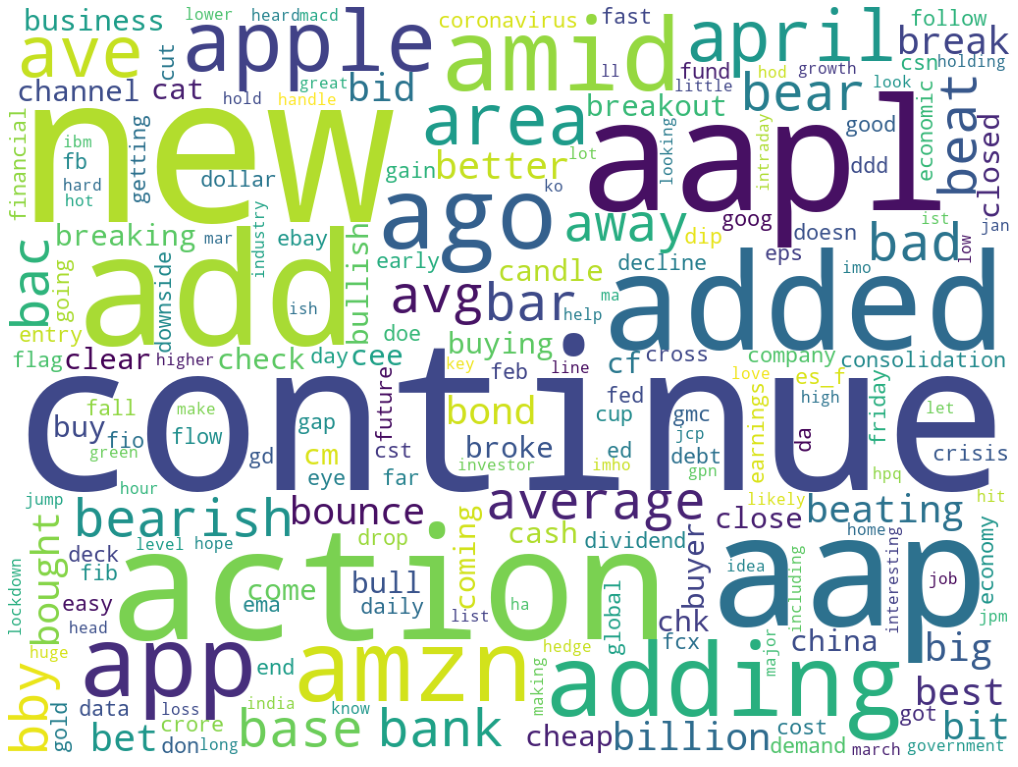

In [84]:
import os
from wordcloud import WordCloud

plt.subplots(figsize=(18,16))
wordcloud=WordCloud(background_color="white",width=1024,height=768).generate(" ".join(data.Words[0:400]))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [45]:
#-1 is replaced with 0
df["Sentiment"] = df["Sentiment"].replace(-1,0)

In [46]:
df["Sentiment"].value_counts()

1    3685
0    2106
Name: Sentiment, dtype: int64

In [48]:
df.shape

(5791, 2)

In [49]:
df1.shape

(400, 1)

In [53]:
from sklearn.model_selection import train_test_split

In [67]:
#Train test split
X=vector.fit_transform(pure_list).toarray()
y= df['Sentiment']

## Split the dataset into Training and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state = 0)

In [92]:
#logistic regression

logistic= LogisticRegression()
logistic.fit(X_train, y_train)
Y_pred = logistic.predict(X_test)

In [93]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.58      0.63       417
           1       0.78      0.85      0.82       742

    accuracy                           0.75      1159
   macro avg       0.74      0.72      0.72      1159
weighted avg       0.75      0.75      0.75      1159



In [70]:
print(confusion_matrix(y_test, Y_pred))

[[243 174]
 [111 631]]


In [ ]:
#logistic regression has 75% accuracy

In [63]:
#random_forest regression

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)

In [64]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65       417
           1       0.81      0.79      0.80       742

    accuracy                           0.74      1159
   macro avg       0.72      0.73      0.72      1159
weighted avg       0.75      0.74      0.75      1159



In [65]:
print(confusion_matrix(y_test, Y_pred))

[[276 141]
 [155 587]]


In [ ]:
# random forest has 74% of accuracy

In [73]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

ada_model.fit(X_train, y_train)

y_pred = ada_model.predict(X_test)

# rounding the result upto 4 digits
print("The Accuracy is: ", round(accuracy_score(y_test, y_pred), 4))

The Accuracy is:  0.7455


In [96]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

ada_model.fit(X_train, y_train)

# predict the attrition on the test data
y_pred_full = ada_model.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred_full))

              precision    recall  f1-score   support

           0       0.69      0.53      0.60       417
           1       0.77      0.87      0.81       742

    accuracy                           0.75      1159
   macro avg       0.73      0.70      0.71      1159
weighted avg       0.74      0.75      0.74      1159



In [97]:
print(confusion_matrix(y_test, y_pred))

[[221 196]
 [ 99 643]]


In [98]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(X_train, y_train)

In [99]:
def get_train_report(model):
    
    train_pred = model.predict(X_train)
    return(classification_report(y_train, train_pred))

In [100]:
def get_test_report(model):
     
    test_pred = model.predict(X_test)
    return(classification_report(y_test, test_pred))

In [101]:
train_report = get_train_report(decision_tree)


print(train_report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1689
           1       0.98      0.98      0.98      2943

    accuracy                           0.98      4632
   macro avg       0.98      0.98      0.98      4632
weighted avg       0.98      0.98      0.98      4632



In [102]:
test_report = get_test_report(decision_tree)


print(test_report)

              precision    recall  f1-score   support

           0       0.56      0.68      0.62       417
           1       0.80      0.70      0.75       742

    accuracy                           0.69      1159
   macro avg       0.68      0.69      0.68      1159
weighted avg       0.71      0.69      0.70      1159



In [103]:
# decision tree model has over fit the model